In [4]:
import pickle
import pandas as pd
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
data_path = './Dataset_1_NCA_battery'
save_path = data_path + '_processed'


# INFO
# Tongji NCA dataset
form_factor = '18650'
anode_material = 'Graphite/Si'
cathode_material = 'Li0.86Ni0.86Co0.11Al0.03 O2 (NCA)'
electrolyte_material = 'Non-aqueous solution with lithium hexafluorophosphate (LiPF6)'
nominal_capacity_in_Ah = 3.5
depth_of_charge = 1
depth_of_discharge = 1
already_spent_cycles = 0
max_voltage_limit_in_V = 4.2
min_voltage_limit_in_V = 2.65
max_current_limit_in_A = ''
min_current_limit_in_A = ''
reference = ''
description = ''
charge_protocol = ''
discharge_protocol = ''
SOC_interval = [0, 1]


df = pd.read_csv('Dataset_1_NCA_battery\CY25-1_1-#1.csv')
df.head()

,time/s,control/V/mA,Ecell/V,<I>/mA,Q discharge/mA.h,Q charge/mA.h,control/V,control/mA,cycle number
0,0.000,3500.0,3.149101,0.058311,0.0,0.001944,0.0,3500.0,2.0
1,0.014,3500.0,3.154381,3499.796569,0.0,0.015554,0.0,3500.0,2.0
2,0.070,3500.0,3.159463,3500.127389,0.0,0.070001,0.0,3500.0,2.0
3,0.202,3500.0,3.164467,3500.217622,0.0,0.198342,0.0,3500.0,2.0
4,0.412,3500.0,3.169628,3500.402831,0.0,0.402532,0.0,3500.0,2.0


100%|██████████| 66/66 [06:09<00:00,  5.61s/it]


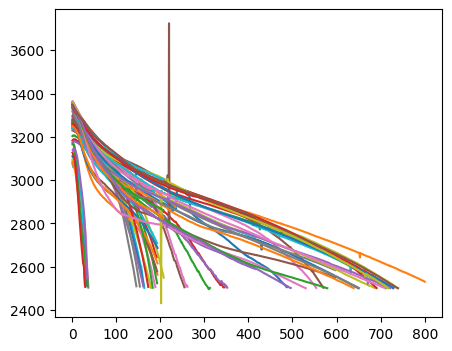

In [6]:
files = os.listdir(data_path)
fig = plt.figure(figsize=(5,4))
for file in tqdm(files):
    save_data = {}
    key = file.split('-#')[1]
    cell_id = key.split('.')[0]
    save_data['cell_id'] = cell_id
    save_data['cycle_data'] = []
    save_data['form_factor'] = form_factor
    save_data['anode_material'] = anode_material
    save_data['cathode_material'] = cathode_material
    save_data['electrolyte_material'] = electrolyte_material
    save_data['nominal_capacity_in_Ah'] = nominal_capacity_in_Ah
    save_data['depth_of_charge'] = depth_of_charge
    save_data['depth_of_discharge'] = depth_of_discharge
    save_data['already_spent_cycles'] = already_spent_cycles
    save_data['max_voltage_limit_in_V'] = max_voltage_limit_in_V
    save_data['min_voltage_limit_in_V'] = min_voltage_limit_in_V
    save_data['max_current_limit_in_A'] = max_current_limit_in_A
    save_data['min_current_limit_in_A'] = min_current_limit_in_A
    save_data['reference'] = reference
    save_data['description'] = description
    save_data['charge_protocol'] = charge_protocol
    save_data['discharge_protocol'] = discharge_protocol
    save_data['SOC_interval'] = SOC_interval
    
    df = pd.read_csv(f'{data_path}/{file}')
    cycle_indices = df['cycle number'].unique()
    total_cycle_data = []
    
    total_Qds = []
    new_indicies = []
    for cycle_index in cycle_indices:
        cycle_df = df.loc[df['cycle number']==cycle_index]
        Qd = max(cycle_df['Q discharge/mA.h'].values)
        if Qd <= 2000:
            # remove the cycle whose capacity suddenly drops to a very low value
            continue
        
        # record the cycle data
        cycle_data = {}
        cycle_data['cycle_number'] = cycle_index
        cycle_data['current_in_A'] = list(cycle_df['<I>/mA'].values * 0.001)
        cycle_data['voltage_in_V'] = list(cycle_df['Ecell/V'].values)
        cycle_data['charge_capacity_in_Ah'] = list(cycle_df['Q charge/mA.h'].values * 0.001)
        cycle_data['discharge_capacity_in_Ah'] = list(cycle_df['Q discharge/mA.h'].values * 0.001)
        cycle_data['time_in_s'] = list(cycle_df['time/s'].values)
        cycle_data['temperature_in_C'] = []
        cycle_data['internal_resistance_in_ohm'] = []
        
        total_cycle_data.append(cycle_data)
        
        total_Qds.append(Qd)
        new_indicies.append(cycle_index)
    save_data['cycle_data'] = total_cycle_data # record the cycle data
    os.makedirs(save_path, exist_ok=True)
    save_name = 'Tongji1_'+file
    save_name = save_name.replace('.csv', '.pkl')
    with open(f'{save_path}/{save_name}', 'wb') as f:
        pickle.dump(save_data, f)
        
    plt.plot(new_indicies, total_Qds)

plt.show()
        